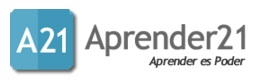

# Curso de Inteligencia Artificial con Python
# Unidad 2-Transformación de imágenes

---

# Introducción

En esta unidad aprenderemos a aplicar **transformaciones geométricas** a las imágenes y comprenderemos cómo utilizar
esas transformaciones para generar nuevas imágenes a partir de la original con efectos geométricos. Discutiremos la subyacente
formulación de matrices de transformación y cómo podemos formular diferentes tipos de transformaciones basadas en nuestras necesidades. 

---

# Transformaciones de las imágenes

<img src="http://aprender21.com/demos/pye/transformaciones.jpg" hspace="0" vspace="0" style="float: right; width: 400px; height:300px;"/>

 &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;
 &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;

A continuación veremos diversas maneras en las que podemos transformar o modificar una imagen usando OpenCV. Estas transformaciones son deformaciones geométricas que nos permiten ya sea trasladar, reescalar, rotar, reflejar y proyectar una imagen conservando muchas de las propiedades de la imagen original.

## Escalado de imágenes

<img src="http://aprender21.com/demos/pye/reescalar.jpg" hspace="0" vspace="0" style="float: right; width: 250px; height:200px;"/>

 &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;

El escalado de una imagen es el proceso de cambiar o redimensionar el tamaño de la imagen, ya sea que la misma se amplie o se reduzca su tamaño. Es una de las operaciones más comunes y frecuentes que se realizan a una imagen.

Veamos algunos ejemplos usando la imagen de las sección anterior.


### interpolación lineal

In [3]:
# Reescalado de ambos ejes de factor 1.2 con interpolación lineal
import cv2
import numpy as np
img=cv2.imread('./imagenes/lena.png')
img_escalada = cv2.resize(img,None,fx=1, fy=1.5, interpolation =cv2.INTER_LINEAR)
cv2.imshow('Imagen original',img)
cv2.imshow('Imagen reescalada',img_escalada)
cv2.waitKey();
cv2.destroyAllWindows()

### Interpolación cúbica

In [4]:
# Reescalado en ambos ejes de factor 1.2 con interpolación cúbica
img_escalada = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation =cv2.INTER_CUBIC)
cv2.imshow('Imagen original',img)
cv2.imshow('Imagen reescalada',img_escalada)
cv2.waitKey();
cv2.destroyAllWindows()

### Interpolación de área

In [5]:
img_escalada = cv2.resize(img,(450,400),fx=0.5, fy=0.5, interpolation =cv2.INTER_AREA)
cv2.imshow('Imagen original',img)
cv2.imshow('Imagen reescalada',img_escalada)
cv2.waitKey();
cv2.destroyAllWindows()

Cada vez que cambiamos el tamaño de una imagen, hay múltiples formas de rellenar los valores de los píxeles.
Cuando ampliamos una imagen, tenemos que rellenar los valores de los píxeles entre píxeles lugares. Cuando estamos encogiendo una imagen, necesitamos tomar el mejor representante valor. Cuando escalamos por un valor no entero, necesitamos interpolar valores
adecuadamente, para que la calidad de la imagen se mantenga. 

Hay múltiples formas de hacer la interpolación. Si estamos agrandando una imagen, es preferible usar una **lineal o
interpolación cúbica**. Si estamos encogiendo una imagen, es preferible usar la basada en el **área
interpolación**. La interpolación cúbica es computacionalmente más compleja, y por lo tanto
más lenta que la interpolación lineal. Pero la calidad de la imagen resultante será mayor.

## Rotación de imágenes

<img src="http://aprender21.com/demos/pye/imagenes/rotacion2.png" hspace="0" vspace="0" style="float: right; width: 200px; height:200px;"/>

&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;

La rotación de una imagen consiste en girar la imagen alrededor de un eje una cantidad de grados preestablecidos. En OpenCV podemos hacerlo de la siguiente manera:

In [8]:
# Usamos Numpy para extraer el numero de filas y 
#de columnas de la imagen

num_filas, num_colums=img.shape[:2]

In [10]:
# Creamos la matriz de rotaciön, en este caso será una 
#rotación de 30°

matriz = cv2.getRotationMatrix2D((num_colums/2, num_filas/2),30, 1)

In [11]:
# Se realiza la rotación de la imagen

img_rotada=cv2.warpAffine(img,matriz,(num_colums,num_filas))
cv2.imshow('Imagen rotada',img_rotada)
cv2.waitKey();
cv2.destroyAllWindows()

Para realizar la rotación debemos crear la matriz de rotación, para esto usamos el comando **cv2.getRotationMatrix2D**, el cual requiere que se le den como parámetros:
* El centro de rotación: En este caso es el punto medio de la imagen
* El ángulo de rotación: En este caso se rotó la imagen 30°
* Facto o scala: En este caso, la imagen mantuvo la dimensión original y por esto este parámetro es igual a 1. Si queremos reducirla a la mitad colocamos 0.5 y así según lo que se requiera
$$T=\begin{pmatrix} cos(\theta) & -sen(\theta)\\ sen(\theta) & cos(\theta) \end{pmatrix}$$
<img src="http://aprender21.com/demos/pye/rotacion.png" hspace="0" vspace="0" style="float: center; width: 250px; height:250px;"/>

In [12]:
# Creamos la matriz de rotaciön, en este caso será una 
# rotación de 30° y reescalado a 0.5

matriz = cv2.getRotationMatrix2D((num_colums/2, num_filas/2), 30, 0.5)

# Se realiza la rotación de la imagen

img_rotada=cv2.warpAffine(img,matriz,(num_colums,num_filas))
cv2.imshow('Imagen rotada',img_rotada)
cv2.waitKey();
cv2.destroyAllWindows()

## Traslación de imágenes

<img src="http://aprender21.com/demos/pye/traslacion.png" hspace="0" vspace="0" style="float: right; width: 200px; height:200px;"/>

&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;

La traslación de imagen se refiere al desplazamiento o movimiento que tiene la misma en algún marco de referencia. Veamos cómo podemos realizar esto con OpenCV

In [15]:
num_folas, num_columss = img.shape[:2]
matriz = np.float32([ [1,0,70], [0,1,100] ])
img_t = cv2.warpAffine(img, matriz, (num_colums,num_filas))
cv2.imshow('Imagen original',img)
cv2.imshow('Translacion', img_t)
cv2.waitKey();
cv2.destroyAllWindows()

La matriz de la trasnformación tiene la siguiente forma:
$$T=\begin{pmatrix} 1 & 0 & t_{x}\\ 0 & 1 & t_{y} \end{pmatrix}$$

donde $t_{x}$ y $t_{y}$ corresponde al desplazamiento que tendrán en el eje $x$ y $y$ respectivamente. En este caso se desplaza 70 pixeles en sentido hotizontal hacia la derecha y 110 pixeles verticalmente hacia abajo. 

Como se aprecia al ser la imagen muy grande, ésta se corta cuando sobrepasa el marco. Si queremos evitar esto podemos hacer lo siguiente:


In [16]:
img_t = cv2.warpAffine(img, matriz, (num_colums+70,num_filas+100))
cv2.imshow('Imagen original',img)
cv2.imshow('Translacion', img_t)
cv2.waitKey();
cv2.destroyAllWindows()

Esto agranda la imagen resultante agregando a cada componente el número de pixeles desplazado.

### Inclinación de imágenes

<img src="http://aprender21.com/demos/pye/inclinacion.png" hspace="0" vspace="0" style="float: right; width: 200px; height:200px;"/>

&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;

La inclinación transforma una región rectangular en un rombo. Sirve para “simular” una perspectiva. La inclinación pueden ser de la siguiente forma:
* Inclinación sobre el eje X, ya sea a la derecha o a la izquierda
* Inclinación sobre el eje Y, ya sea hacia arriba o hacia abajo.
* Inclinación en X e Y.

Cuando se va a crear una transformación afin, particular una inclinación, necesitamos tres puntos de control. A partir de estos puntos desplazaremos los restantes manteniendolos en el marco que estos puntos forman. Veamos un ejemplo

In [17]:
num_filas, num_colums = img.shape[:2]
pto_control = np.float32([[0,0], [num_colums-1,0], [0,num_filas-1]])
pto_dest = np.float32([[0,0], [int(0.6*(num_colums-1)),0], [int(0.4*(num_colums-1)),num_filas-1]])
matriz = cv2.getAffineTransform(pto_control, pto_dest)
img_output = cv2.warpAffine(img,matriz, (num_colums,num_filas))
cv2.imshow('Imagen Original', img)
cv2.imshow('Imagen de salida', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

La imagen siguiente muestra la inclinación anterior usando los puntos indicados como referencia

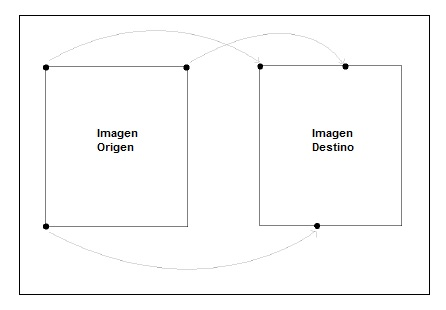

Veamos otro ejemplo:

In [18]:
pto_control= np.float32([[0,0], [num_colums-1,0], [0,num_filas-1]])
pto_dest  = np.float32([[num_colums-1,0], [0,0], [num_colums-1,num_filas-1]])

In [19]:
matriz = cv2.getAffineTransform(pto_control, pto_dest)
img_output = cv2.warpAffine(img,matriz, (num_colums,num_filas))
cv2.imshow('Imagen Original', img)
cv2.imshow('Imagen de salida', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

En este caso vemos una reflexión respecto al eje vertical 
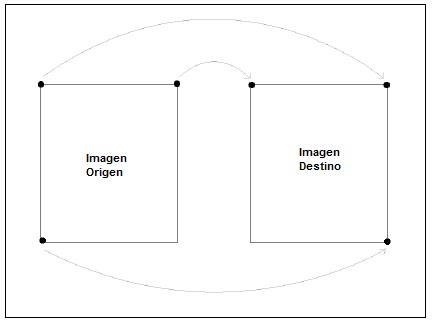

## Proyecciones
<img src="http://aprender21.com/demos/pye/proyecciones.png" hspace="0" vspace="0" style="float: right; width: 250px; height:250px;"/>

Las transformaciones afines vistas anteriormenta son agradables, pero imponen ciertas restricciones. Las proyecciones, por otro lado, nos da más libertad. Para entender las transformaciones proyectivas, necesitamos entender cómo funciona la geometría proyectiva. Básicamente describimos lo que le sucede a una imagen cuando se cambia el punto de vista. Por ejemplo, si estás de pie a la derecha delante de una hoja de papel con un cuadrado dibujado en ella, se verá como un cuadrado. Ahora, si empiezas a inclinar esa hoja de papel, el cuadrado empezará a verse más y más como un trapezoide. Las transformaciones proyectivas nos permiten capturar esta dinámica en una bonita de forma matemática. Estas transformaciones no conservan ni tamaños ni ángulos, pero preservan la incidencia y la relación cruzada.

Ahora que sabemos lo que son las transformaciones proyectivas, veamos si podemos extraer más información aquí. Podemos decir que dos imágenes cualesquiera en un plano dado están relacionadas por una homografía. Mientras estén en el mismo plano, podemos transformar cualquier cosa en cualquier otra cosa. Esto tiene muchas aplicaciones prácticas como la realidad aumentada, la rectificación de la imagen, el registro de la imagen, o el cálculo del movimiento de la cámara entre dos imágenes. Una vez que la rotación y la traslación de la cámara han sido extraídas de un matriz de homografía estimada, esta información puede ser utilizada para la navegación, o para insertar modelos de objetos 3D en una imagen o video. De esta manera, se renderizan con
la perspectiva correcta y parecerá que fueron parte de la escena original.


In [ ]:
# Puntos de control
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1],[int(0.66*cols),rows-1]])

In [23]:
rows, cols = img.shape[:2]
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
cv2.imshow('Imagen Original', img)
cv2.imshow('Proyeccion', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

Podemos elegir cuatro puntos de control en la imagen de origen y mapearlos hacia la imagen destino. Las líneas paralelas no permanecerán paralelas después de la transformación. Usamos una función llamada **getPerspectiveTransform** para obtener la matriz de transformación.

Vamos a usar los siguientes puntos de control para crear algunos efectos divertidos usando la transformación proyectiva y veamos qué parecen. Todo lo que tenemos que hacer es cambiar los puntos de control para obtener diferentes efectos.

In [21]:
# Puntos de control 1
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0],[cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101], [cols/2,0],[cols/2,rows-1]])

# Fin de la Unidad
Con esto hemos cubierto aspectos básicos pero fundamentales en el procesamiento y transformación de imágenes. En la próxima unidad complementaremos con la aplicación de filtros a imágenes. 